How do the shapes of the error-envelope change as 1 dimensionless quantity changes?

1. Have 1 basic configuration, reasonably high added mass and damping.
2. Pick 1 thing to vary, vary it, plot alpha, beta values.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np

In [2]:
file1 = "data/predetermined-4.pkl"

big_nmk, nmk_max = 200, 150
heaving, NMK, rho = [0, 1, 0], [big_nmk] * 4, 1023

m0_r2_base = 2.5
h = 30
radwidth1 = 0.5
hmdr_base = 25
left_ratio_base = 0.9
left_ratio_alt = 1.3
right_ratio_base = 1.3
right_ratio_alt = 0.8
inner_rad_ratio_base = 0.25
outer_rad_ratio_base = 0.5

def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 1):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def generate_d_a(h, radwidth1, hmdr, left_ratio, right_ratio,
                 inner_rad_ratio, outer_rad_ratio, m0_r2):
  hmd1 = hmdr * radwidth1
  hmd0, hmd2 = left_ratio * hmd1, right_ratio * hmd1
  radwidth0 = radwidth1/inner_rad_ratio
  radwidth2 = radwidth1/outer_rad_ratio
  m0 = m0_r2/radwidth2
  radwidths = [radwidth0, radwidth1, radwidth2]
  hmds = [hmd0, hmd1, hmd2]
  a = [sum(radwidths[0:i+1]) for i in range(3)]
  d = [h - hmd for hmd in hmds]
  for i in range(3):
    assert radwidths[i] > 0
    assert d[i] > 0
    assert hmds[i] >= radwidths[i] # This is for the chosen nmk_max.
  return d, a, m0

# all_prob_sets = []
# # base
# prob_set = []
# d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio_base, right_ratio_base,
#                         inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
# prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished base.")

# # hmdr
# hmdrs = list(np.linspace(5, 30, 29))
# prob_set = []
# for hmdr in hmdrs:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr, left_ratio_base, right_ratio_base,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished hmdrs.")

# # hmdr, but the right ratio < 1
# hmdrs = list(np.linspace(5, 30, 29))
# prob_set = []
# for hmdr in hmdrs:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr, left_ratio_base, right_ratio_alt,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished second set of hmdrs.")

# # hmdr, but the left ratio > 1
# hmdrs = list(np.linspace(5, 30, 29))
# prob_set = []
# for hmdr in hmdrs:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr, left_ratio_alt, right_ratio_base,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished third set of hmdrs.")

# # hmdr, but the right ratio < 1, left ratio > 1
# hmdrs = list(np.linspace(5, 30, 29))
# prob_set = []
# for hmdr in hmdrs:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr, left_ratio_alt, right_ratio_alt,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished fourth set of hmdrs.")

# # left ratio
# left_ratios = list(np.linspace(0.2, 0.9, 8)) + list(np.linspace(0.91, 1.09, 19)) + list(np.linspace(1.1, 1.5, 5))
# prob_set = []
# for left_ratio in left_ratios:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio, right_ratio_base,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished left ratios.")

# # right ratio
# right_ratios = list(np.linspace(0.2, 0.9, 8)) + list(np.linspace(0.91, 1.09, 19)) + list(np.linspace(1.1, 1.5, 5))
# prob_set = []
# for right_ratio in right_ratios:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio_base, right_ratio,
#                           inner_rad_ratio_base, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished right ratios.")

# # inner rad ratio
# inner_rad_ratios = list(np.linspace(0.05, 0.45, 9)) + list(np.linspace(0.5, 1.1, 7))
# prob_set = []
# for inner_rad_ratio in inner_rad_ratios:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio_base, right_ratio_base,
#                           inner_rad_ratio, outer_rad_ratio_base, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished inner rad ratios.")

# # outer rad ratio
# outer_rad_ratios = list(np.linspace(0.05, 0.45, 9)) + list(np.linspace(0.5, 0.9, 5))
# prob_set = []
# for outer_rad_ratio in outer_rad_ratios:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio_base, right_ratio_base,
#                           inner_rad_ratio_base, outer_rad_ratio, m0_r2_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished outer rad ratios.")

# # m0 * dist_to_e
# m0_r2s = list(np.linspace(0.5, 5, 11))
# prob_set = []
# for m0_r2 in m0_r2s:
#   d, a, m0 = generate_d_a(h, radwidth1, hmdr_base, left_ratio_base, right_ratio_base,
#                           inner_rad_ratio_base, outer_rad_ratio, m0_r2)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished m0r2.")


In [3]:
all_prob_sets = open_pkl_file(file1)
for prob_set in all_prob_sets:
  generate_convergence_data(prob_set, [0.01, 0.005])
  generate_log_data(prob_set)

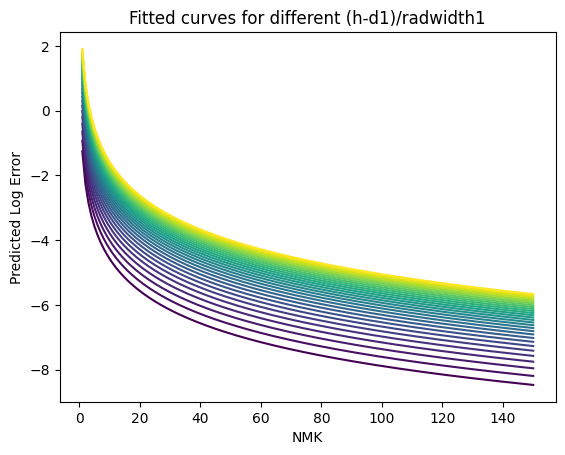

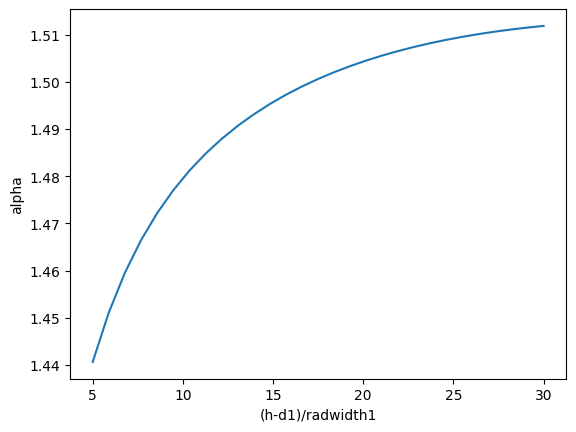

fitted slope: 0.00234, slope/avg: 0.00156


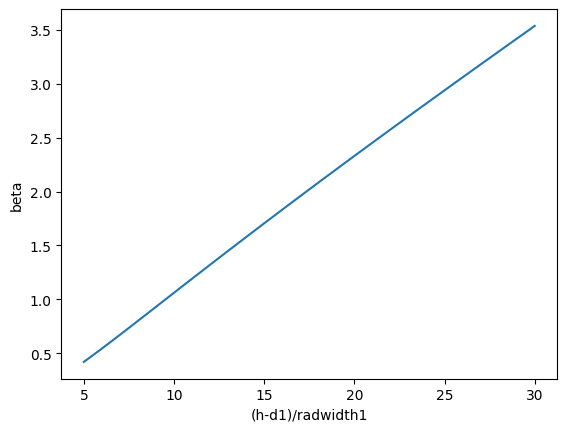

fitted slope: 0.125, slope/avg: 0.0625
Average covariance matrix:
 [[3.50307968e-05 1.16717695e-04]
 [1.16717695e-04 5.05994804e-04]]


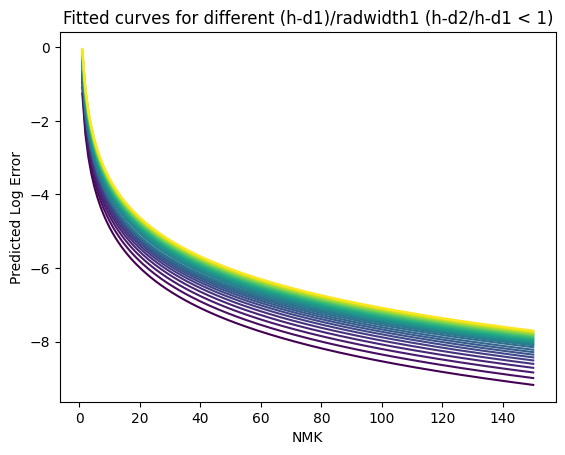

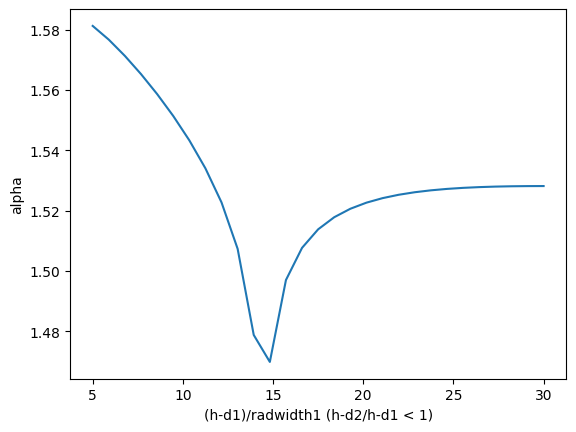

fitted slope: -0.00138, slope/avg: -0.000902


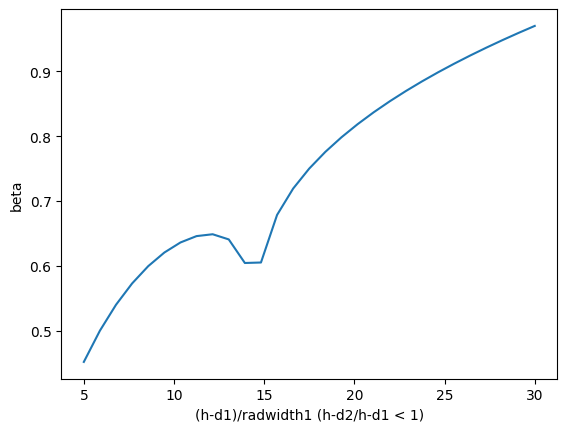

fitted slope: 0.0199, slope/avg: 0.0267
Average covariance matrix:
 [[0.00043088 0.0009008 ]
 [0.0009008  0.00201229]]


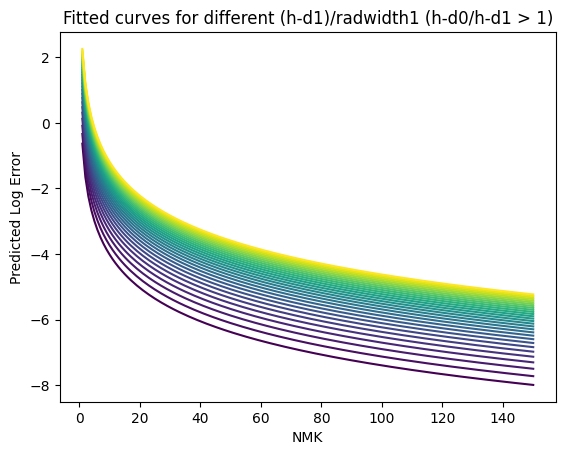

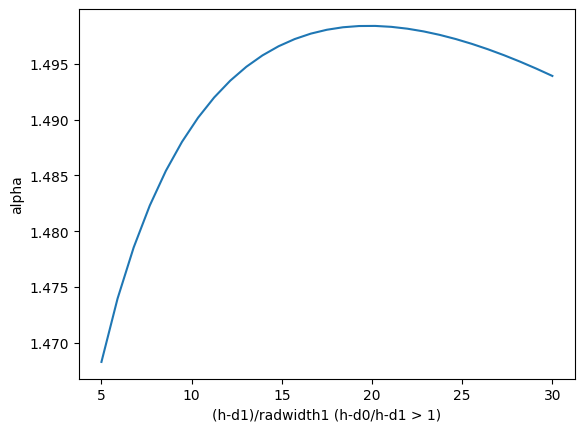

fitted slope: 0.000729, slope/avg: 0.000488


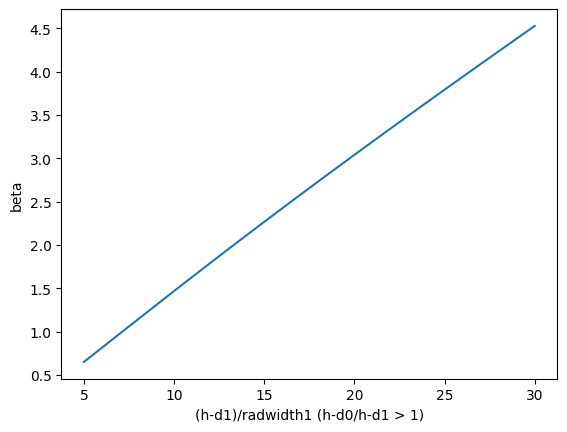

fitted slope: 0.155, slope/avg: 0.0589
Average covariance matrix:
 [[1.75858518e-05 8.47109909e-05]
 [8.47109909e-05 5.20592820e-04]]


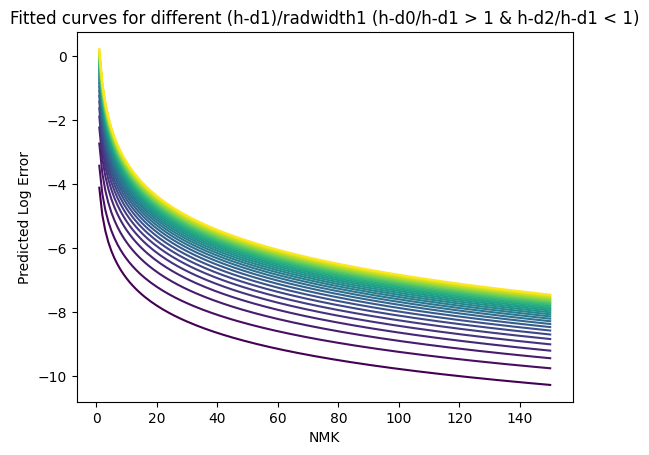

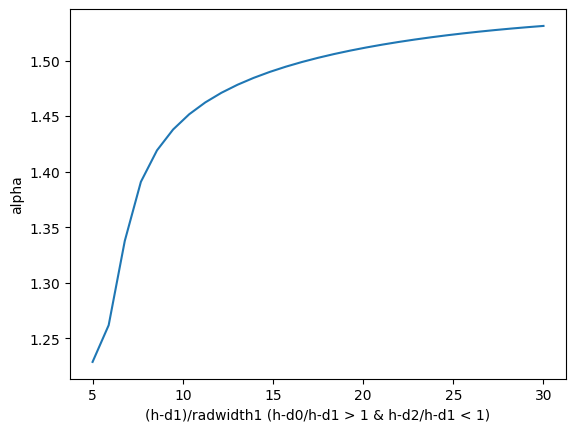

fitted slope: 0.0083, slope/avg: 0.00563


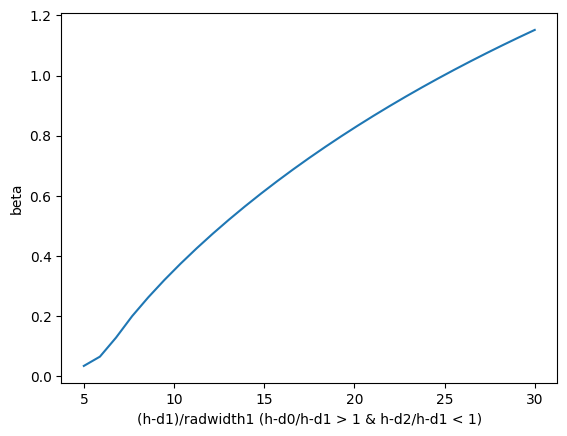

fitted slope: 0.0444, slope/avg: 0.0656
Average covariance matrix:
 [[0.00029659 0.00030898]
 [0.00030898 0.00057356]]


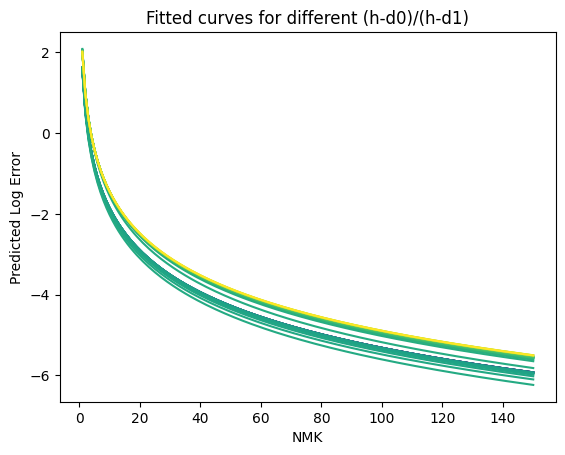

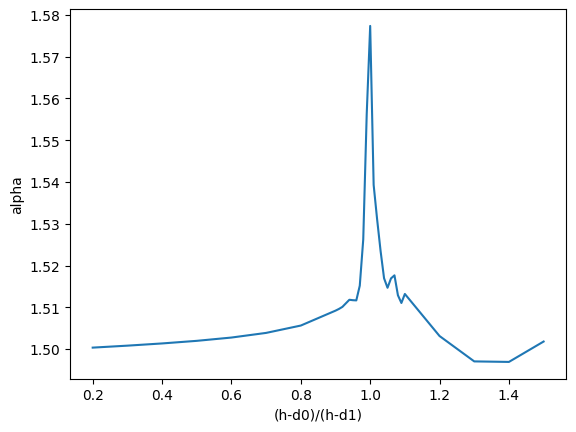

fitted slope: 0.0103, slope/avg: 0.00679


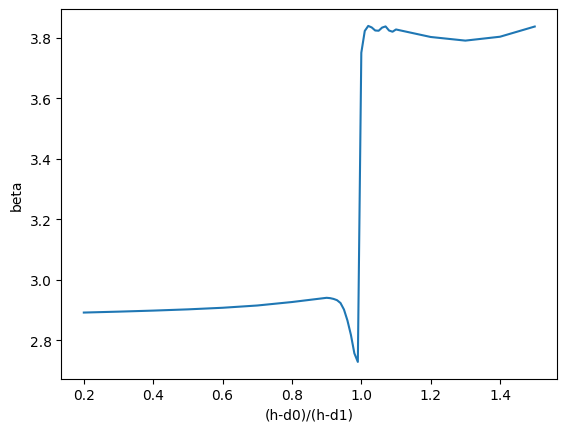

fitted slope: 1.06, slope/avg: 0.32
Average covariance matrix:
 [[4.27252456e-05 2.45392733e-04]
 [2.45392733e-04 1.57401198e-03]]


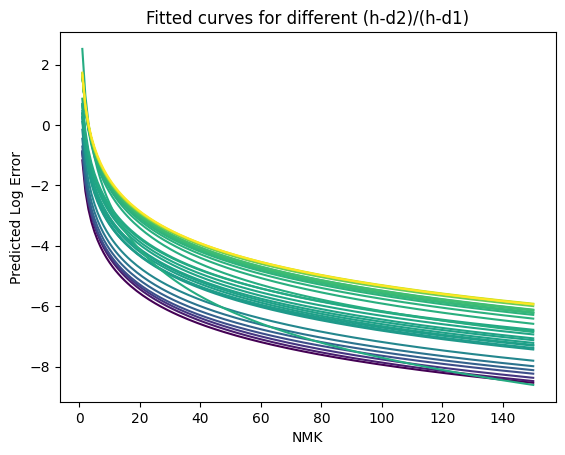

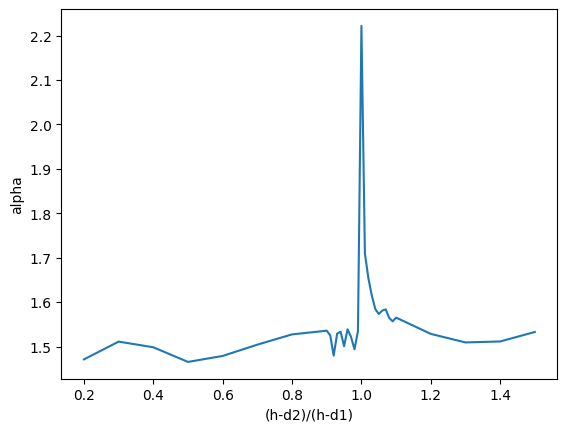

fitted slope: 0.0895, slope/avg: 0.0574


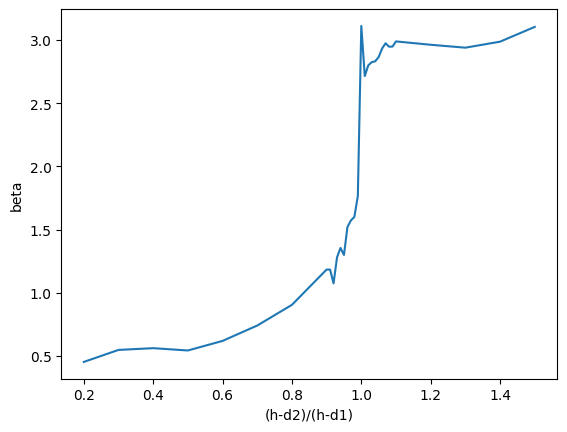

fitted slope: 2.87, slope/avg: 1.48
Average covariance matrix:
 [[0.00058381 0.00185036]
 [0.00185036 0.00680805]]


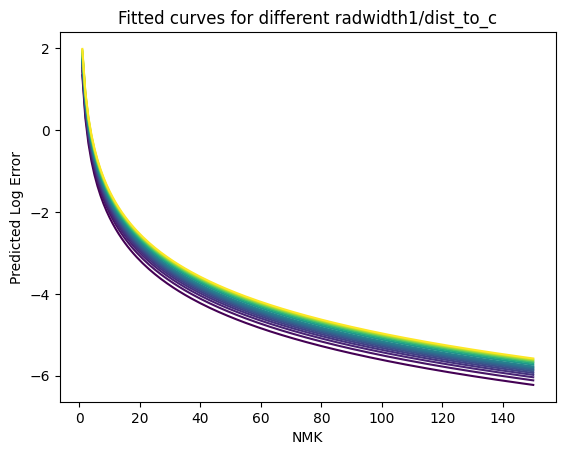

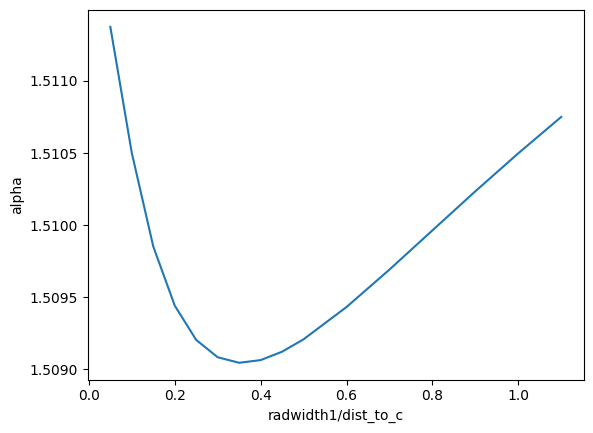

fitted slope: 0.000428, slope/avg: 0.000283


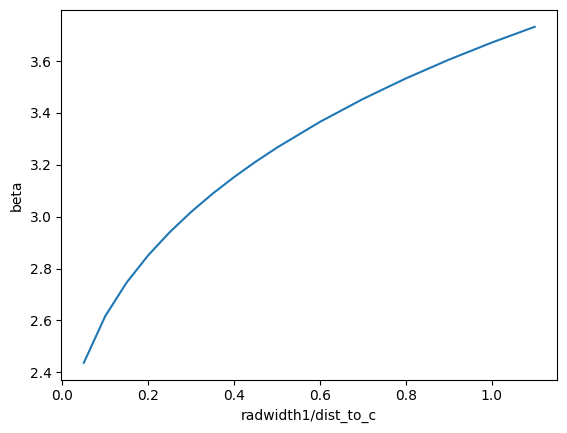

fitted slope: 1.14, slope/avg: 0.359
Average covariance matrix:
 [[1.54008749e-05 9.22497977e-05]
 [9.22497977e-05 6.15866905e-04]]


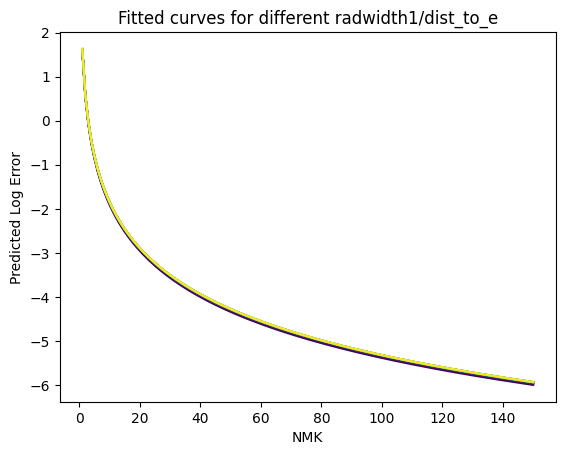

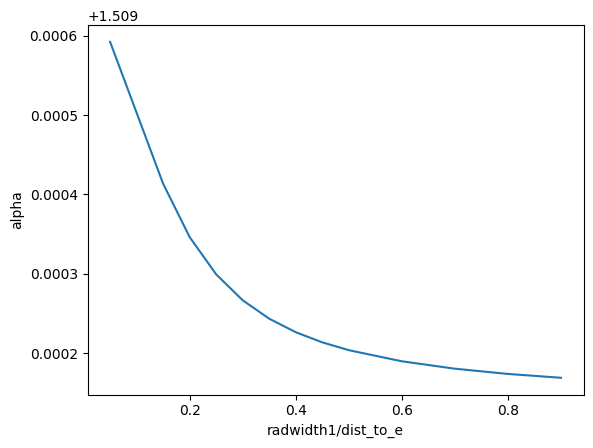

fitted slope: -0.000423, slope/avg: -0.00028


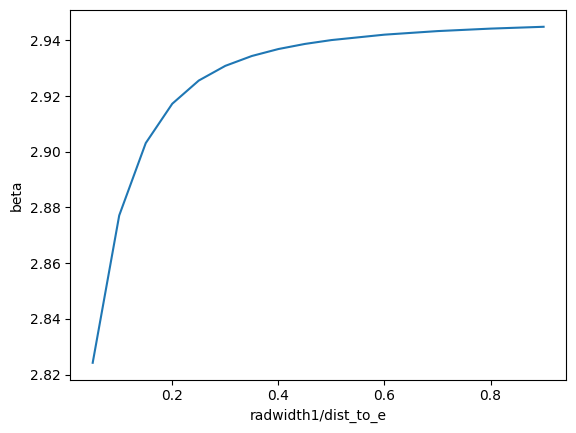

fitted slope: 0.0941, slope/avg: 0.0322
Average covariance matrix:
 [[1.61361740e-05 9.24955384e-05]
 [9.24955384e-05 5.83848575e-04]]


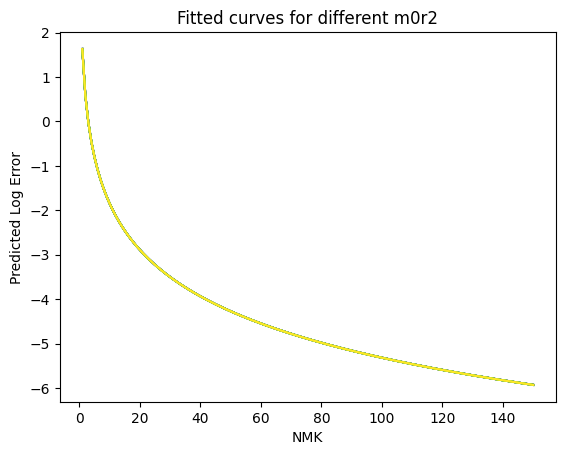

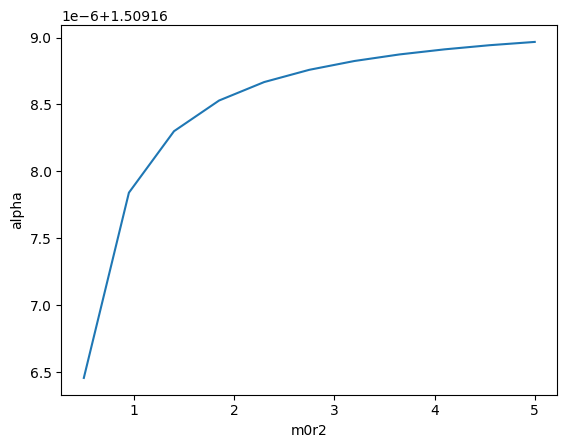

fitted slope: 3.97e-07, slope/avg: 2.63e-07


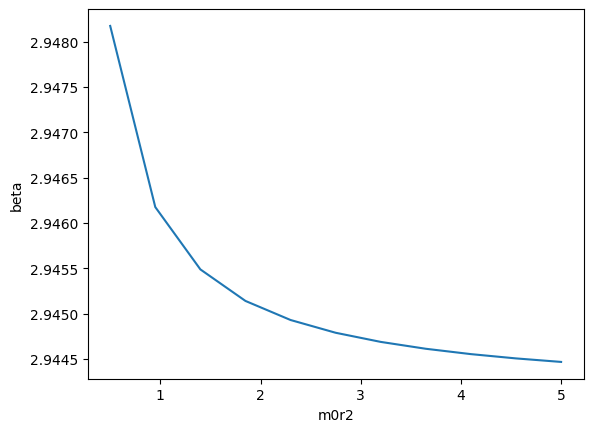

fitted slope: -0.000592, slope/avg: -0.000201
Average covariance matrix:
 [[1.60959325e-05 9.27688729e-05]
 [9.27688729e-05 5.89029416e-04]]


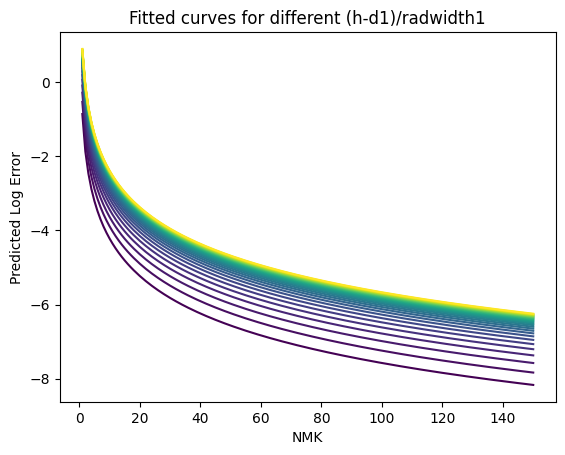

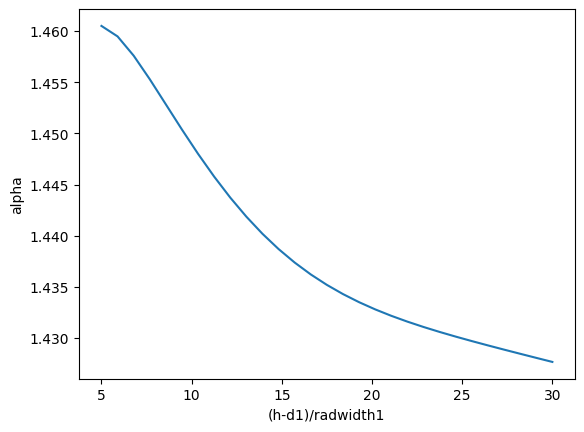

fitted slope: -0.00131, slope/avg: -0.000907


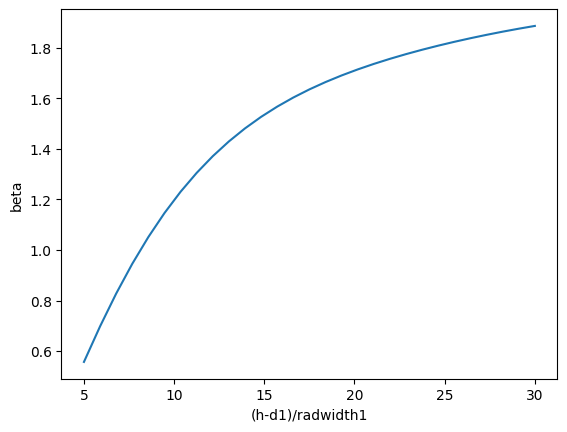

fitted slope: 0.0465, slope/avg: 0.031
Average covariance matrix:
 [[6.75657840e-05 2.69945796e-04]
 [2.69945796e-04 1.18221941e-03]]


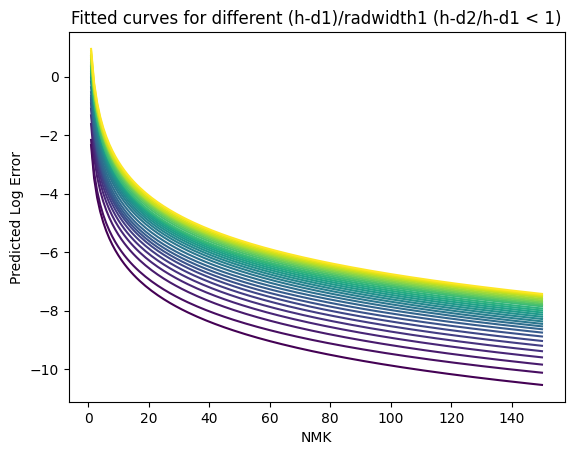

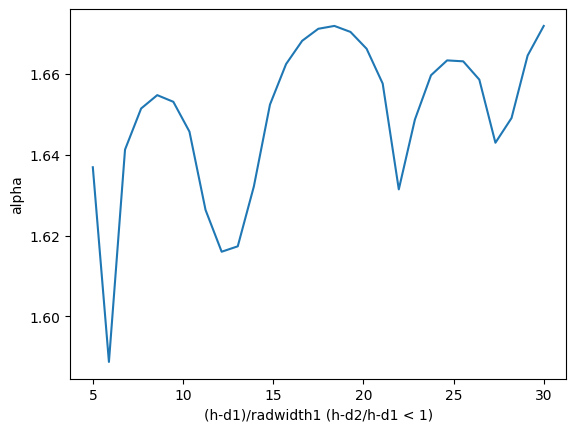

fitted slope: 0.00133, slope/avg: 0.000806


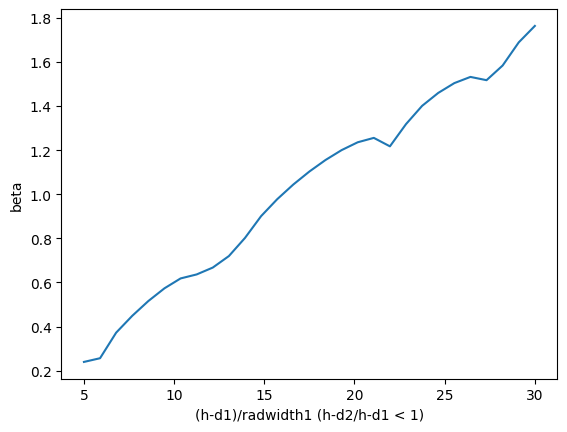

fitted slope: 0.0588, slope/avg: 0.0574
Average covariance matrix:
 [[0.00124454 0.00308022]
 [0.00308022 0.00904674]]


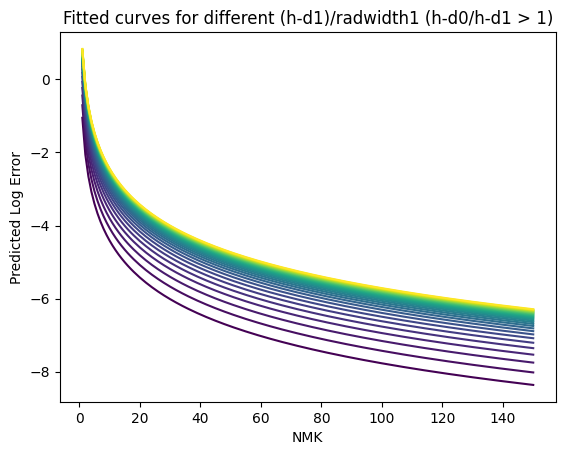

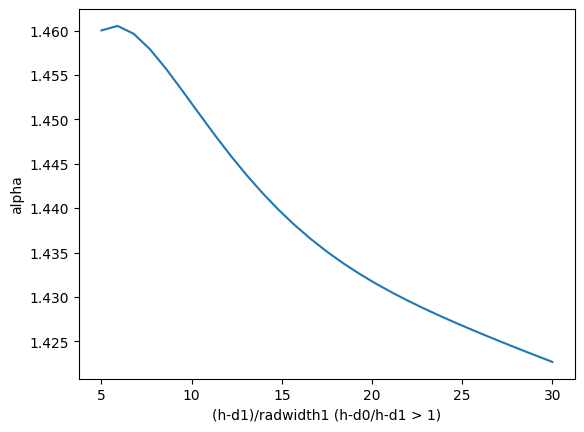

fitted slope: -0.00162, slope/avg: -0.00112


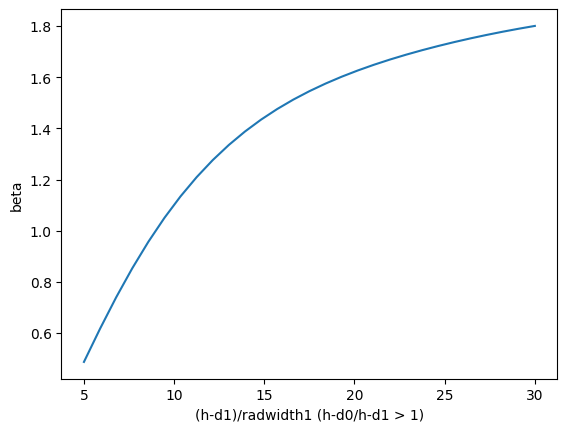

fitted slope: 0.0466, slope/avg: 0.0331
Average covariance matrix:
 [[5.99792661e-05 2.32592019e-04]
 [2.32592019e-04 9.89424334e-04]]


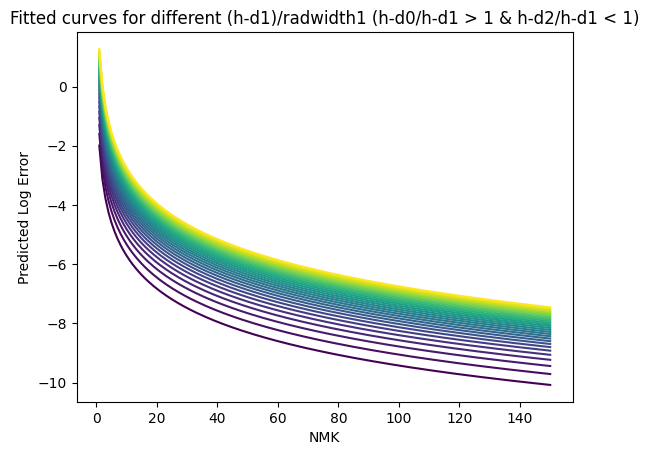

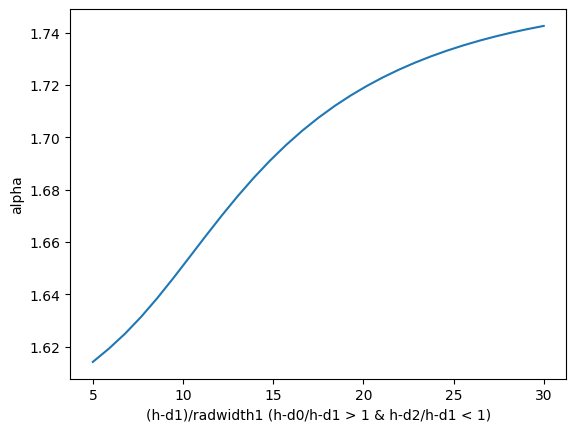

fitted slope: 0.00537, slope/avg: 0.00317


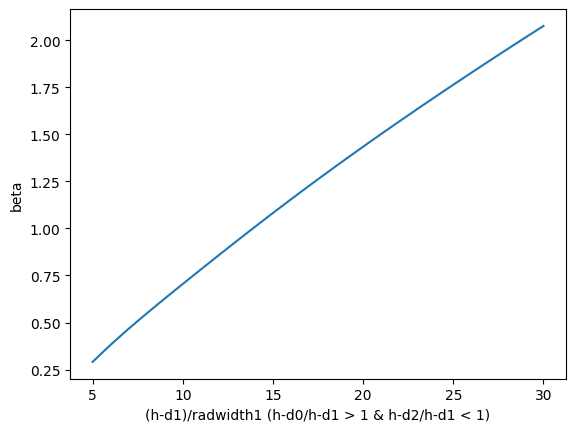

fitted slope: 0.0708, slope/avg: 0.0574
Average covariance matrix:
 [[0.00019553 0.0005054 ]
 [0.0005054  0.0015567 ]]


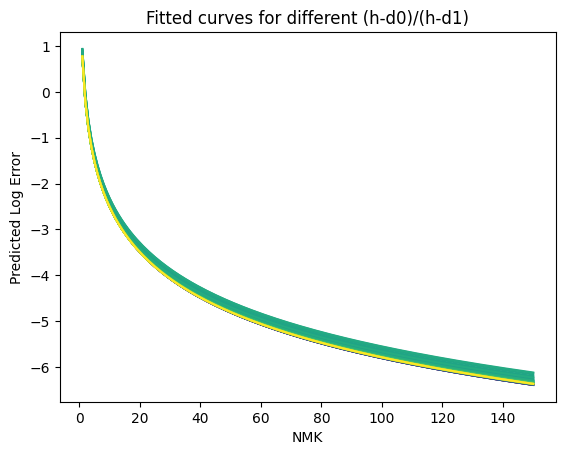

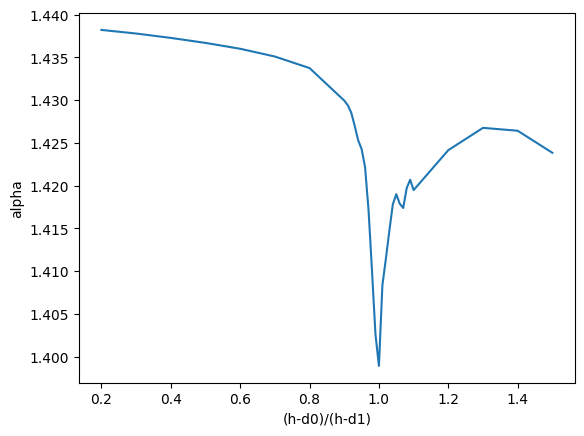

fitted slope: -0.0198, slope/avg: -0.0139


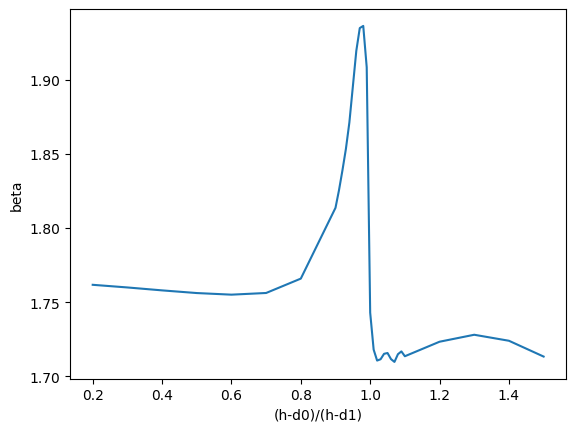

fitted slope: -0.0374, slope/avg: -0.021
Average covariance matrix:
 [[9.41882617e-05 4.09396667e-04]
 [4.09396667e-04 1.91452804e-03]]


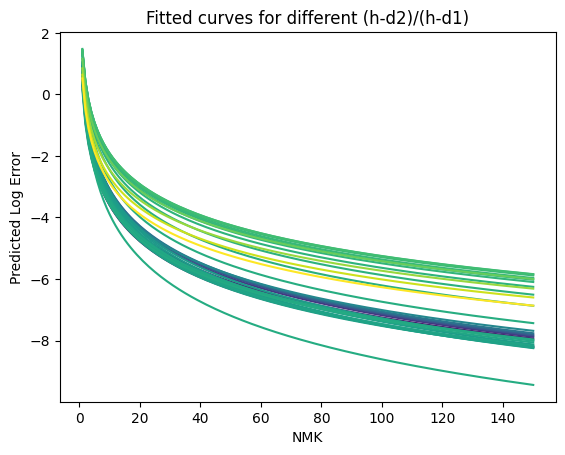

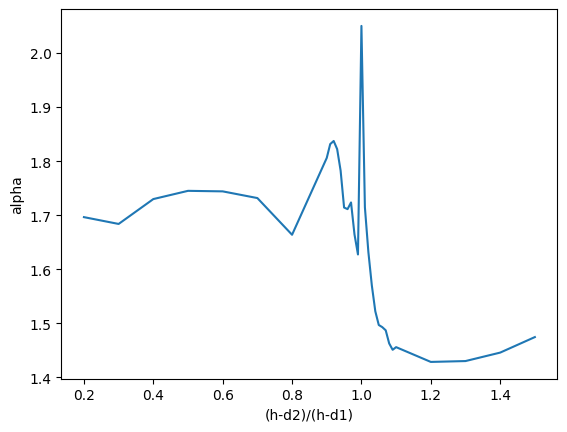

fitted slope: -0.269, slope/avg: -0.164


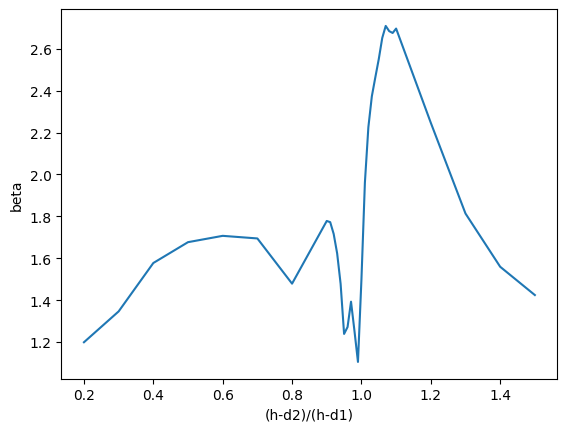

fitted slope: 0.632, slope/avg: 0.344
Average covariance matrix:
 [[0.00095487 0.00291925]
 [0.00291925 0.00993947]]


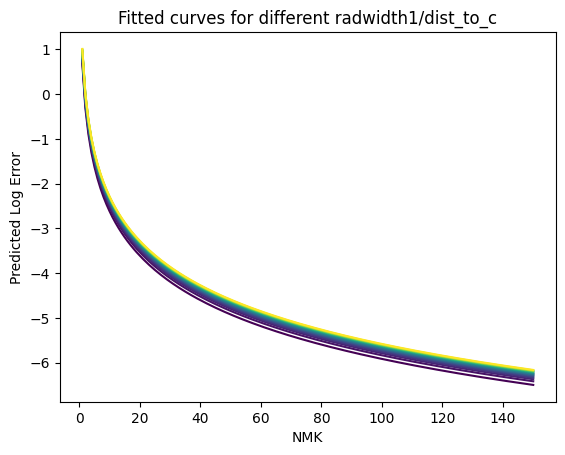

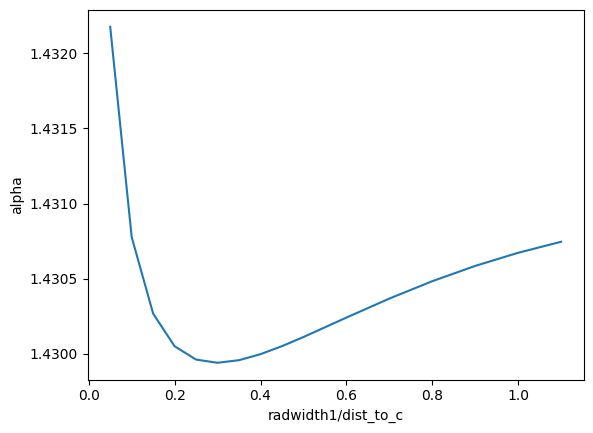

fitted slope: -3.3e-05, slope/avg: -2.31e-05


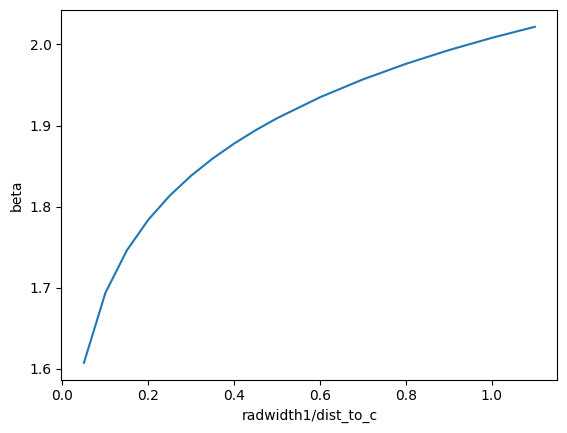

fitted slope: 0.335, slope/avg: 0.179
Average covariance matrix:
 [[9.70223078e-05 4.33135466e-04]
 [4.33135466e-04 2.08592320e-03]]


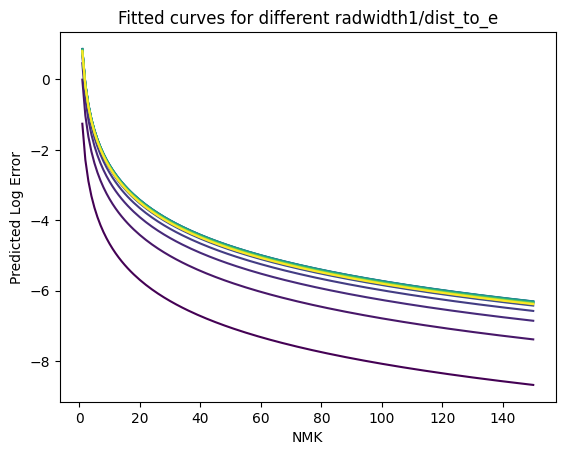

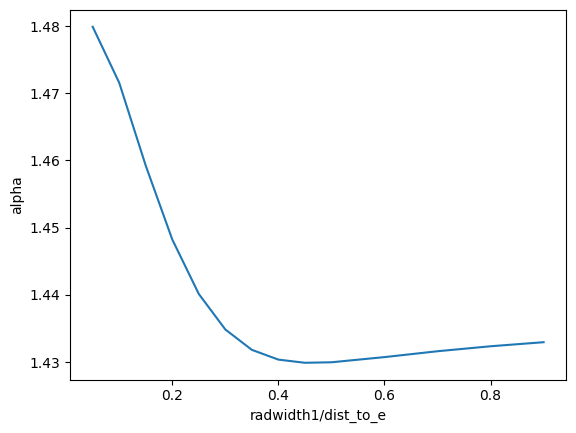

fitted slope: -0.0463, slope/avg: -0.0321


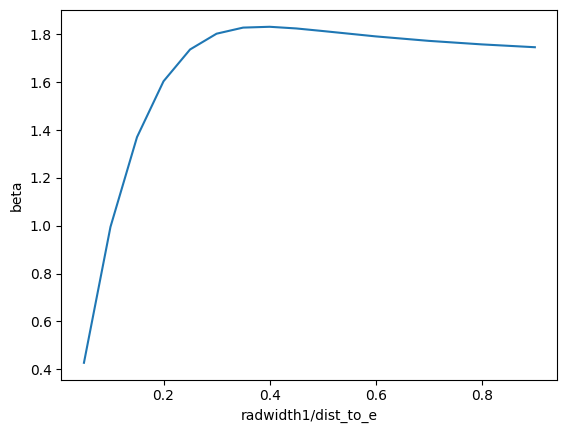

fitted slope: 0.95, slope/avg: 0.597
Average covariance matrix:
 [[7.49603883e-05 3.10241913e-04]
 [3.10241913e-04 1.40309315e-03]]


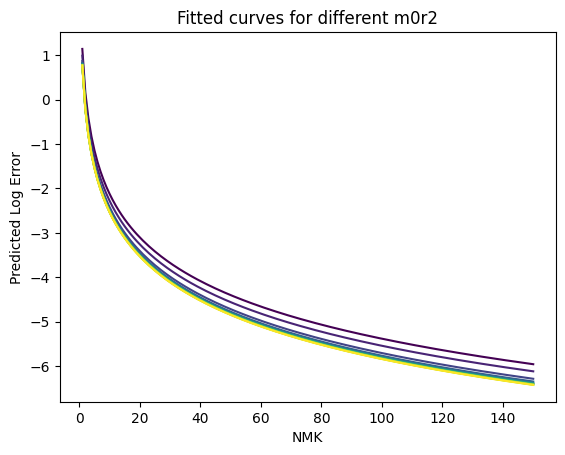

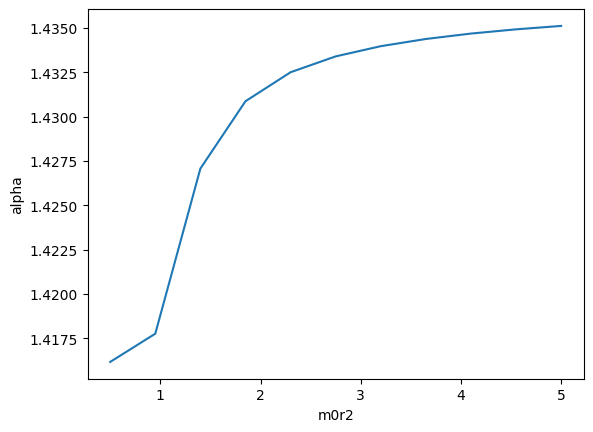

fitted slope: 0.00393, slope/avg: 0.00275


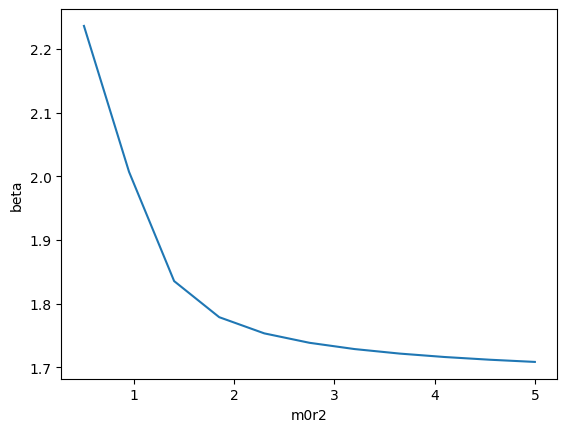

fitted slope: -0.0872, slope/avg: -0.0481
Average covariance matrix:
 [[9.22094015e-05 4.05644166e-04]
 [4.05644166e-04 1.93022677e-03]]


In [4]:
fs = {"(h-d1)/radwidth1" : lambda cf, m0 : (cf["h"] - cf["d"][1])/(cf["a"][1] - cf["a"][0]),
      "(h-d0)/(h-d1)" : lambda cf, m0 : (cf["h"] - cf["d"][0])/(cf["h"] - cf["d"][1]),
      "(h-d2)/(h-d1)" : lambda cf, m0 : (cf["h"] - cf["d"][2])/(cf["h"] - cf["d"][1]),
      "radwidth1/dist_to_c" : lambda cf, m0 : (cf["a"][1] - cf["a"][0])/(cf["a"][0]),
      "radwidth1/dist_to_e" : lambda cf, m0 : (cf["a"][1] - cf["a"][0])/(cf["a"][-1] - cf["a"][1]),
      "m0r2" : lambda cf, m0 : (cf["a"][2] - cf["a"][1]) * m0}

dimensionless_quantities = {"(h-d1)/radwidth1" : [all_prob_sets[1], fs["(h-d1)/radwidth1"]],
                            "(h-d1)/radwidth1 (h-d2/h-d1 < 1)" : [all_prob_sets[2], fs["(h-d1)/radwidth1"]],
                            "(h-d1)/radwidth1 (h-d0/h-d1 > 1)" : [all_prob_sets[3], fs["(h-d1)/radwidth1"]],
                            "(h-d1)/radwidth1 (h-d0/h-d1 > 1 & h-d2/h-d1 < 1)" : [all_prob_sets[4], fs["(h-d1)/radwidth1"]],
                            "(h-d0)/(h-d1)" : [all_prob_sets[5], fs["(h-d0)/(h-d1)"]],
                            "(h-d2)/(h-d1)" : [all_prob_sets[6], fs["(h-d2)/(h-d1)"]],
                            "radwidth1/dist_to_c" : [all_prob_sets[7], fs["radwidth1/dist_to_c"]],
                            "radwidth1/dist_to_e" : [all_prob_sets[8], fs["radwidth1/dist_to_e"]],
                            "m0r2" : [all_prob_sets[9], fs["m0r2"]]}

am_r2s = []
dp_r2s = []

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "am", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  am_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "dp", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  dp_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

In [5]:
key_lst = list(dimensionless_quantities.keys())
print("ams")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"{min(am_r2s[i][0]):.3g}")
  print(f"{min(am_r2s[i][1]):.3g}")
print("dps")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"{min(dp_r2s[i][0]):.3g}")
  print(f"{min(dp_r2s[i][1]):.3g}")

ams
(h-d1)/radwidth1
0.992
0.992
(h-d1)/radwidth1 (h-d2/h-d1 < 1)
0.927
0.765
(h-d1)/radwidth1 (h-d0/h-d1 > 1)
0.997
0.997
(h-d1)/radwidth1 (h-d0/h-d1 > 1 & h-d2/h-d1 < 1)
0.808
-0.745
(h-d0)/(h-d1)
0.965
0.646
(h-d2)/(h-d1)
0.797
0.672
radwidth1/dist_to_c
0.999
0.998
radwidth1/dist_to_e
0.999
0.998
m0r2
0.999
0.998
dps
(h-d1)/radwidth1
0.993
0.983
(h-d1)/radwidth1 (h-d2/h-d1 < 1)
0.882
0.633
(h-d1)/radwidth1 (h-d0/h-d1 > 1)
0.993
0.985
(h-d1)/radwidth1 (h-d0/h-d1 > 1 & h-d2/h-d1 < 1)
0.986
0.98
(h-d0)/(h-d1)
0.988
0.983
(h-d2)/(h-d1)
0.777
0.588
radwidth1/dist_to_c
0.992
0.98
radwidth1/dist_to_e
0.993
0.983
m0r2
0.991
0.976


(h-d1)/radwidth1


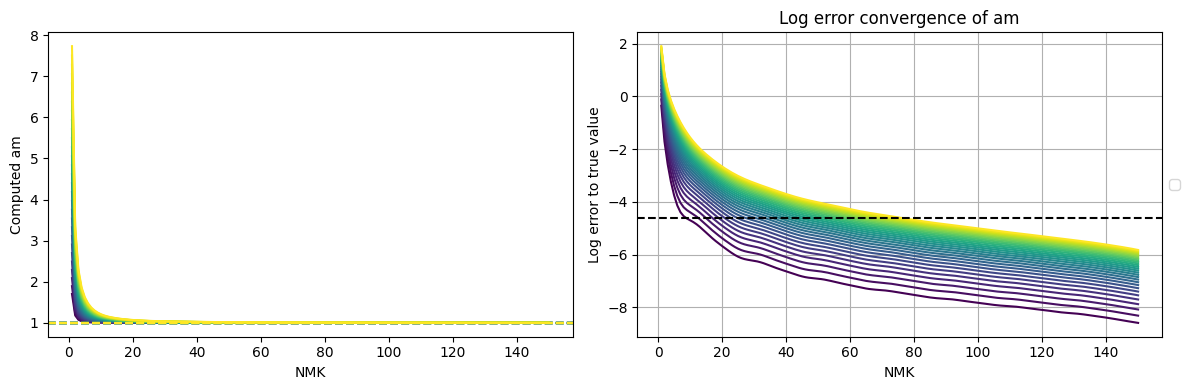

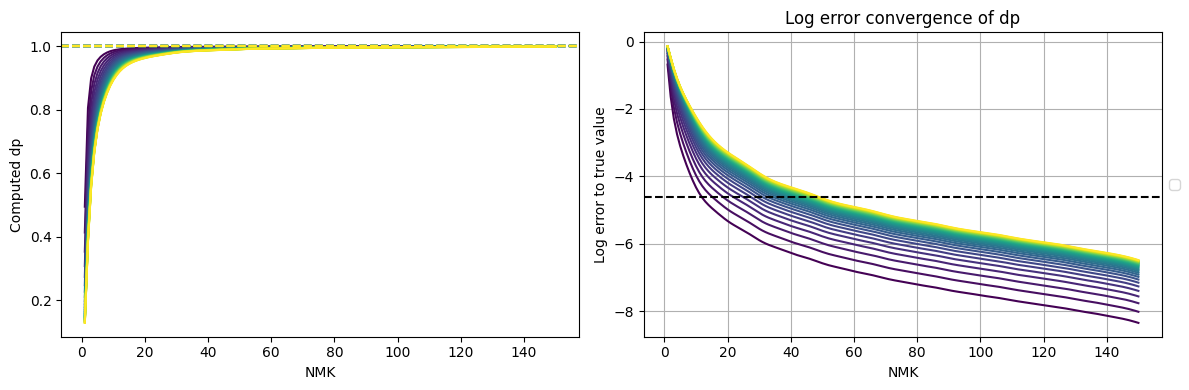

(h-d1)/radwidth1 (h-d2/h-d1 < 1)


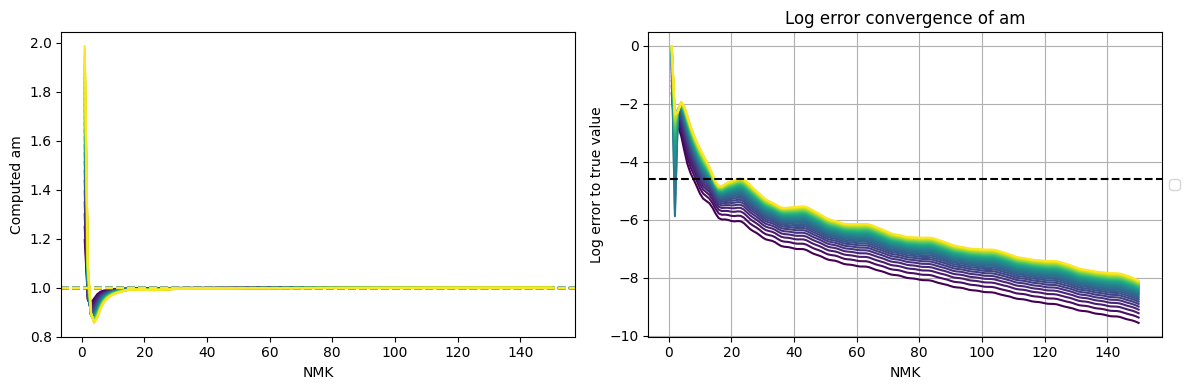

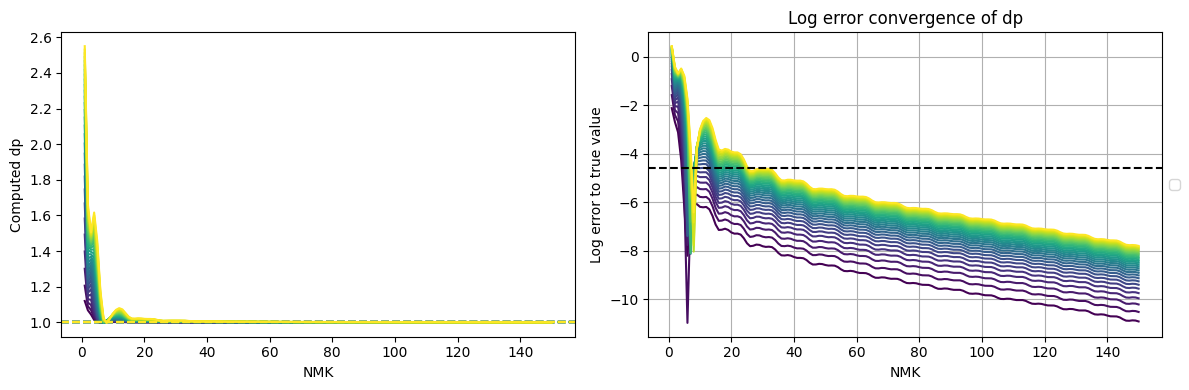

(h-d1)/radwidth1 (h-d0/h-d1 > 1)


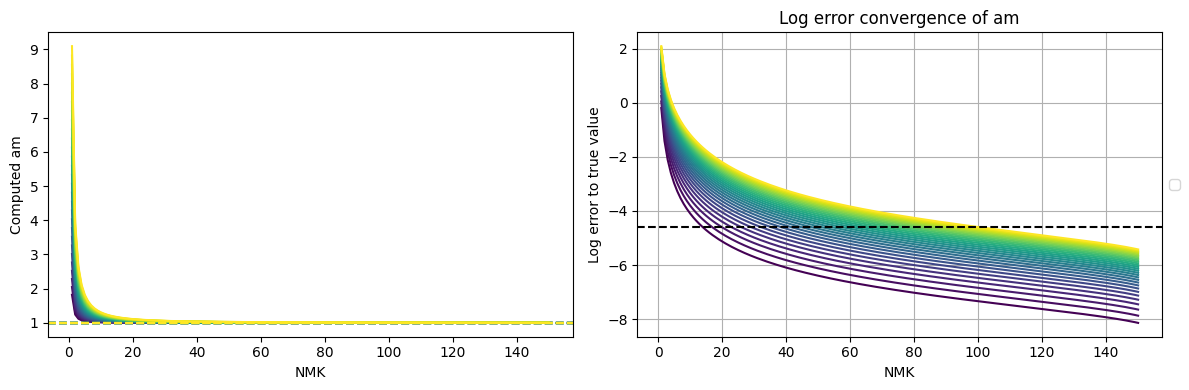

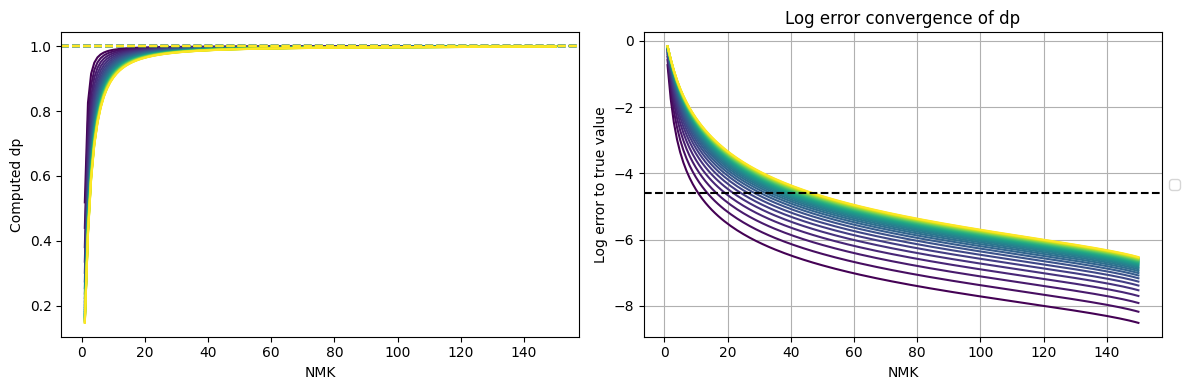

(h-d1)/radwidth1 (h-d0/h-d1 > 1 & h-d2/h-d1 < 1)


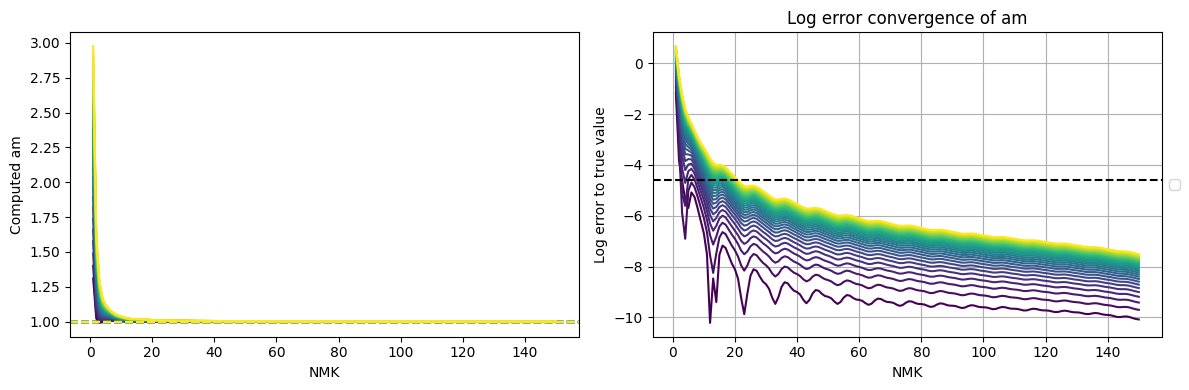

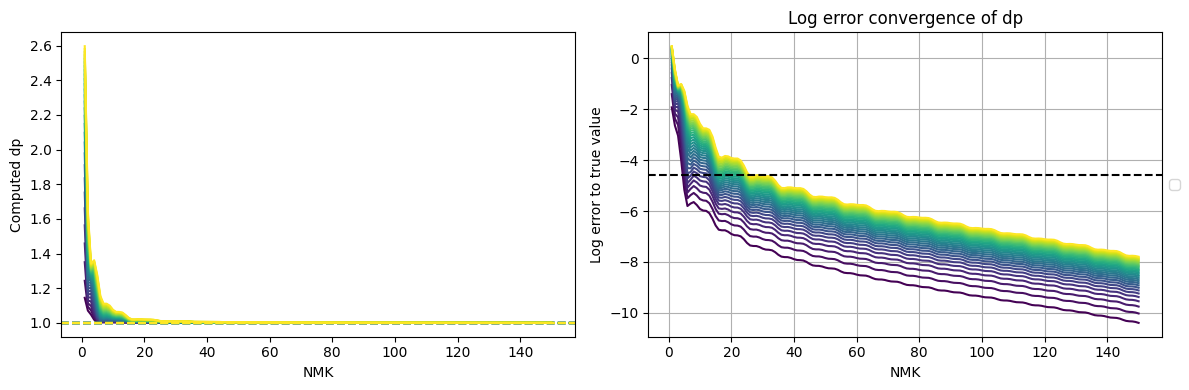

(h-d0)/(h-d1)


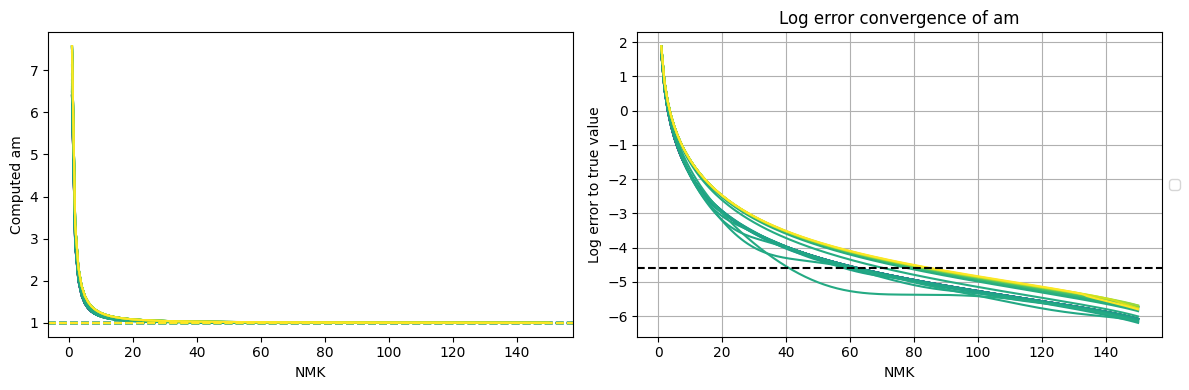

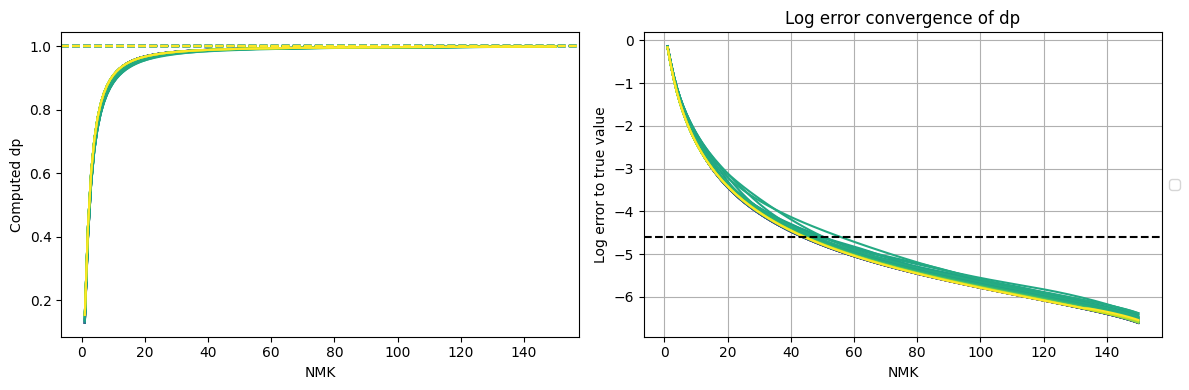

(h-d2)/(h-d1)


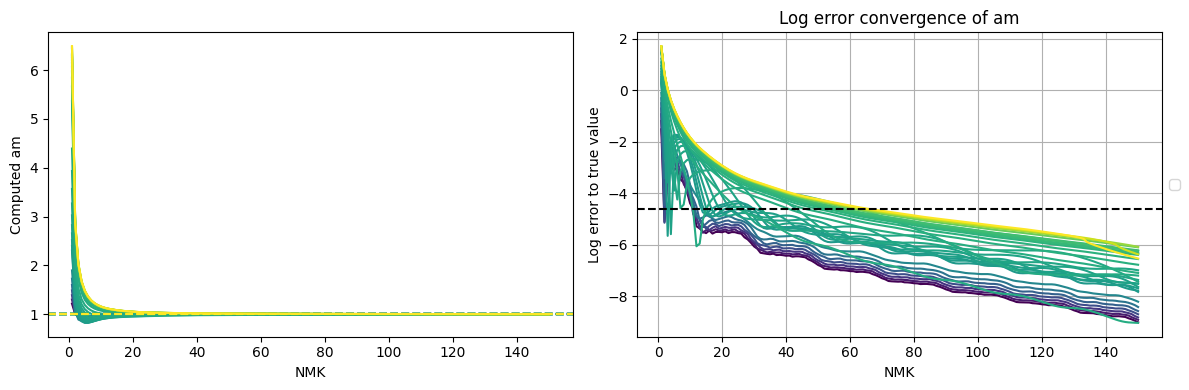

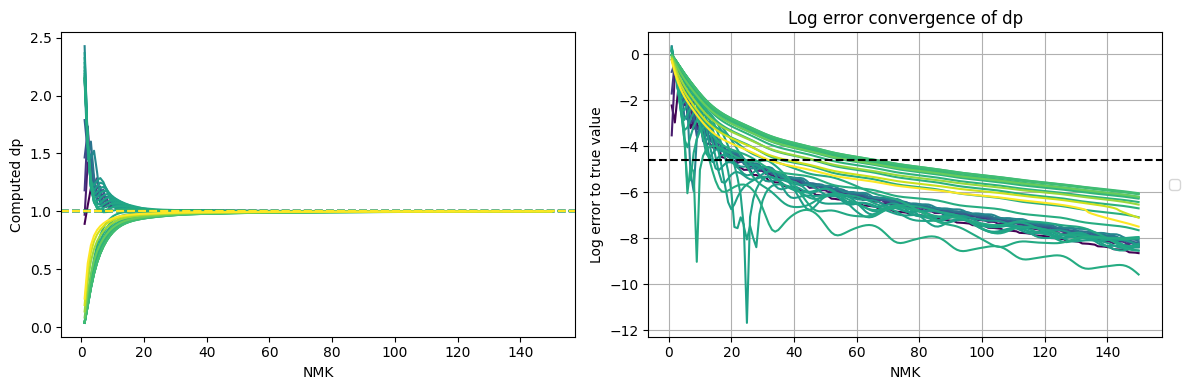

radwidth1/dist_to_c


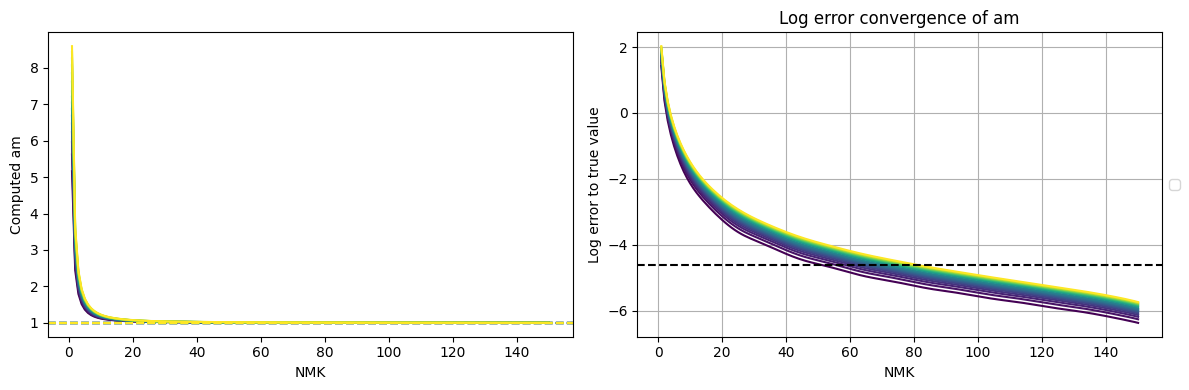

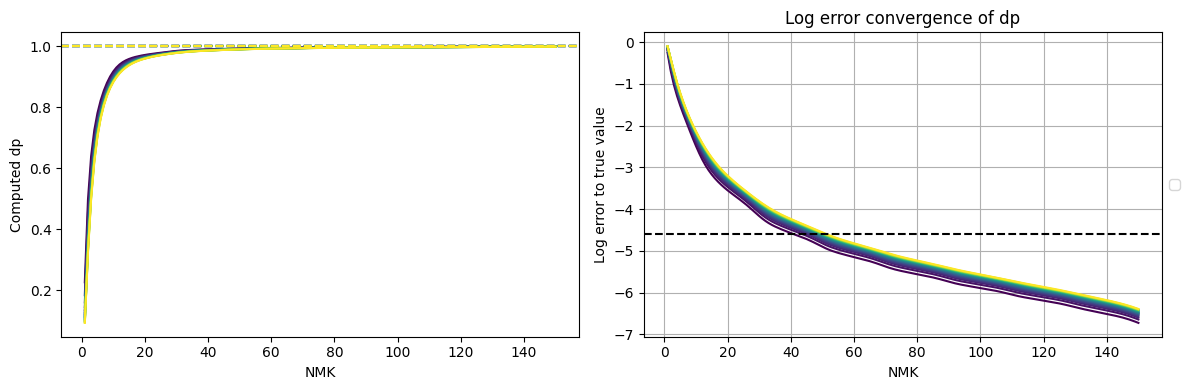

radwidth1/dist_to_e


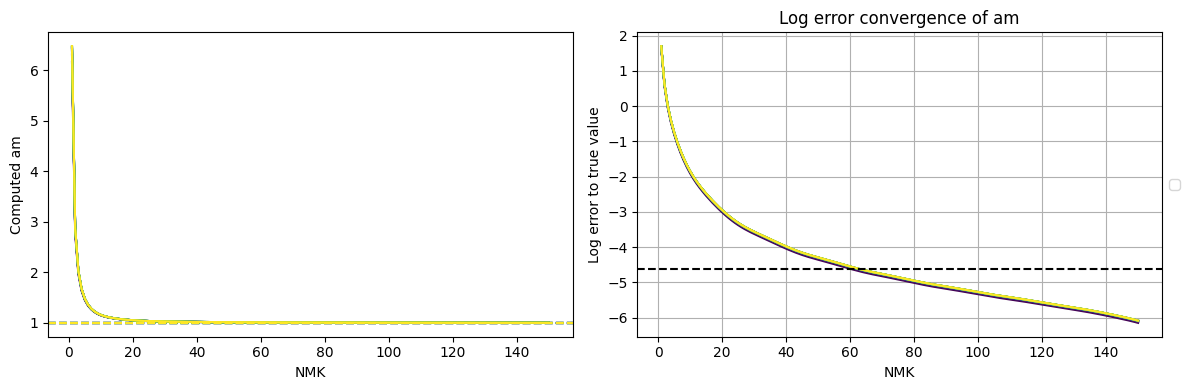

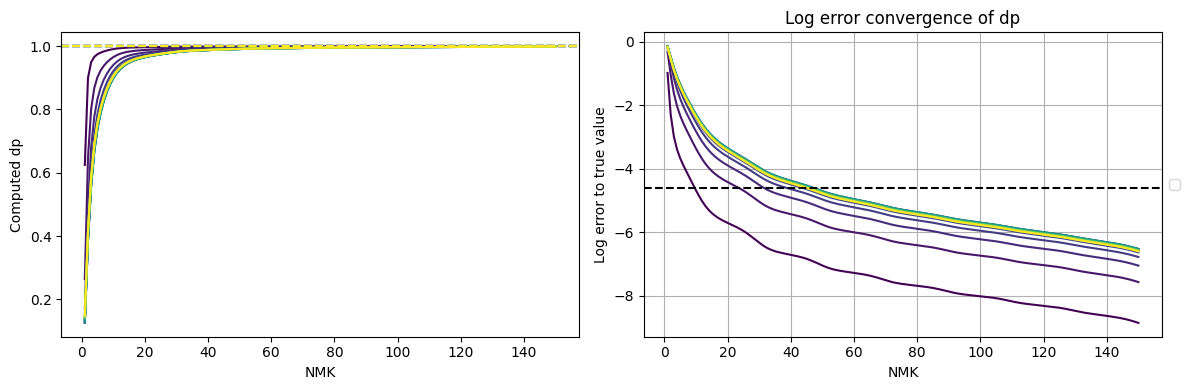

m0r2


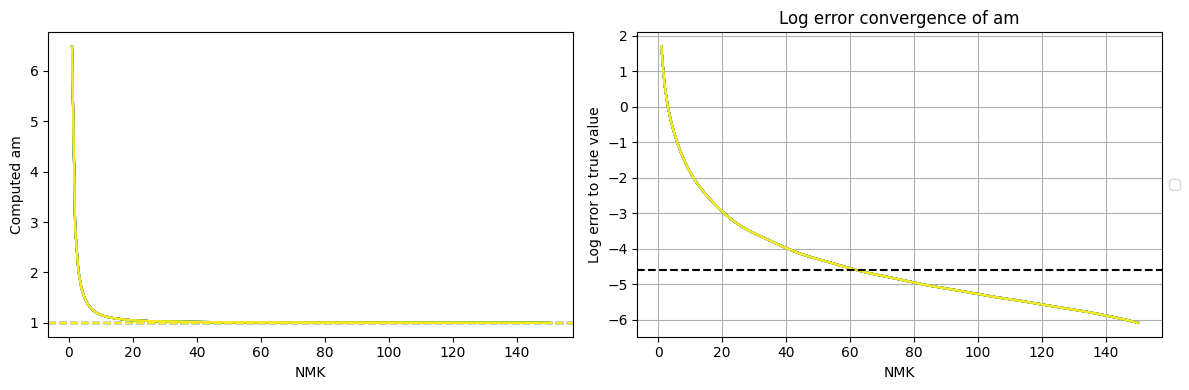

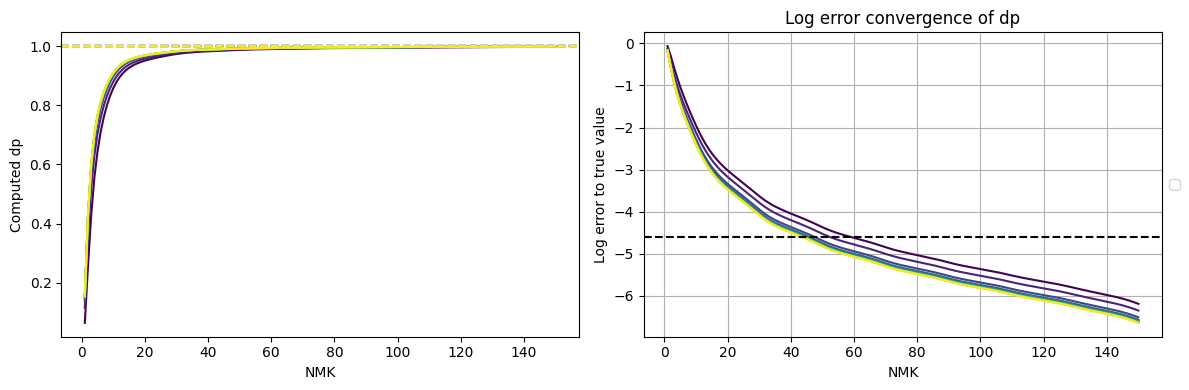

In [8]:
for key in dimensionless_quantities.keys():
  print(key)
  info = dimensionless_quantities[key]
  data = many_data_dicts_to_convergence_plot_data(info[0], all_m0s = True)
  colors = color_by_f_value(info[1], info[0], all_m0s = True)
  plot_set_convergence_and_log(data, "am", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)
  plot_set_convergence_and_log(data, "dp", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)

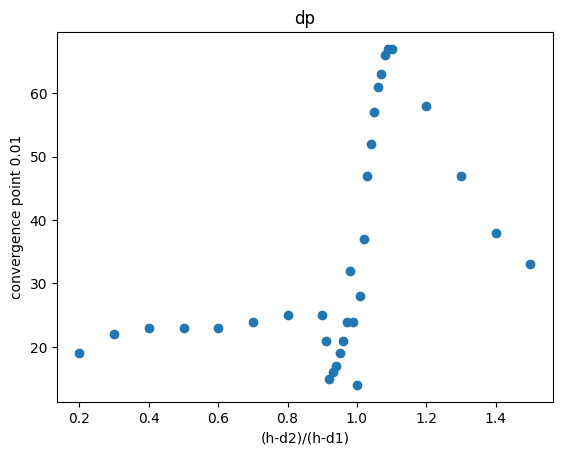

In [ ]:
key = "(h-d2)/(h-d1)"
[data, xfunc] = dimensionless_quantities[key]
plot_hydros_against_1(data, "dp", 0.01, xfunc, xlabel = key, ylabel = None, title = None)